In [1]:
import os
# # model_path = "/media/hugo/Seagate Expansion Drive/wiki_dump/wordvectors/final_word2vec.model"
# model_path = "/media/hugo/Seagate Expansion Drive/wiki_dump/wordvectors/temp/word2vec_1.model"

# assert os.path.exists(model_path), "Add the correct path to the model"

In [2]:
from gensim.models import Word2Vec



In [3]:
# show model vocabulary
# print(len(model.wv.vocab.keys()))

In [4]:
temp_model_folder = "/media/hugo/Seagate Expansion Drive/wiki_dump/wordvectors/temp"


In [5]:

#create list of files in the folder
files = os.listdir(temp_model_folder)
files.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))
print(len(files))

605


In [6]:
def load_model(file):
    model = Word2Vec.load(os.path.join(temp_model_folder, file))
    return model



In [7]:
def get_vocab_size(model):
    return len(model.wv.vocab.keys())

In [8]:
# for file in files:
#     model = load_model(file)
#     print(get_vocab_size(model))

In [9]:
from tqdm.notebook import tqdm
# get sizes of vocabularies
vocab_sizes = [get_vocab_size(load_model(file)) for file in tqdm(files)]

  0%|          | 0/605 [00:00<?, ?it/s]

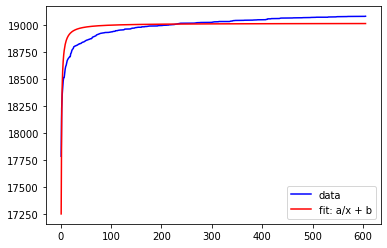

[-1769.14114318 19018.17750558]
4990.478103715828
[-1769.14114318 19018.17750558]
fitted function: y = -1769.1411431758436 / x + 19018.177505576743


In [10]:
# fit 1/x line
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b):
    return a / x + b

x = np.array(range(1, len(vocab_sizes)+1))
y = np.array(vocab_sizes)

popt, pcov = curve_fit(func, x, y)

plt.plot(x, y, 'b-', label='data')
plt.plot(x, func(x, *popt), 'r-', label='fit: a/x + b')
plt.legend()
plt.show()

print(popt)

# calculate error of fit
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y, func(x, *popt)))

# print popt
print(popt)

# print fitted function
print("fitted function: y = {} / x + {}".format(popt[0], popt[1]))


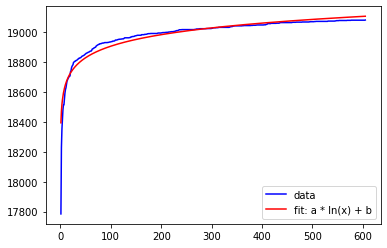

1185.5144059431536
[  111.46625408 18394.49706869]
fitted function: y = 111.46625407984148 * ln(x) + 18394.49706869147


In [11]:
# fit ln(x) line
def func(x, a, b):
    return a * np.log(x) + b

x = np.array(range(1, len(vocab_sizes)+1))
y = np.array(vocab_sizes)

popt, pcov = curve_fit(func, x, y)

plt.plot(x, y, 'b-', label='data')
plt.plot(x, func(x, *popt), 'r-', label='fit: a * ln(x) + b')
plt.legend()

plt.show()

# calculate error of fit
# from sklearn.metrics import mean_squared_error
print(mean_squared_error(y, func(x, *popt)))

# print popt
print(popt)

# print fitted function
print("fitted function: y = {} * ln(x) + {}".format(popt[0], popt[1]))

In [12]:
# # fit ln(a*x + b) line
# def func(x, a, b):
#     return np.log(a * x + b)

# x = np.array(range(1, len(vocab_sizes)+1))
# y = np.array(vocab_sizes)

# popt, pcov = curve_fit(func, x, y)

# plt.plot(x, y, 'b-', label='data')
# plt.plot(x, func(x, *popt), 'r-', label='fit: ln(a * x + b)')
# plt.legend()

# plt.show()

# # calculate error of fit
# # from sklearn.metrics import mean_squared_error
# print(mean_squared_error(y, func(x, *popt)))

# # print popt
# print(popt)

# # print fitted function
# print("fitted function: y = ln({} * x + {})".format(popt[0], popt[1]))

/home/hugo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


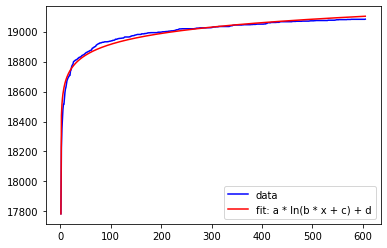

416.5590826725853
[  103.42032632  5078.93745812 -5070.08385366 17557.74969693]
fitted function: y = 103.42032631785554 * ln(5078.937458117719 * x + -5070.083853664525) + 17557.749696933883


In [13]:
# fit a * ln(b*x + c) + d line
def func(x, a, b, c, d):
    return a * np.log(b * x + c) + d

x = np.array(range(1, len(vocab_sizes)+1))
y = np.array(vocab_sizes)

popt, pcov = curve_fit(func, x, y)

plt.plot(x, y, 'b-', label='data')
plt.plot(x, func(x, *popt), 'r-', label='fit: a * ln(b * x + c) + d')
plt.legend()

plt.show()

# calculate error of fit

print(mean_squared_error(y, func(x, *popt)))

# print popt
print(popt)

# print fitted function
print("fitted function: y = {} * ln({} * x + {}) + {}".format(popt[0], popt[1], popt[2], popt[3]))



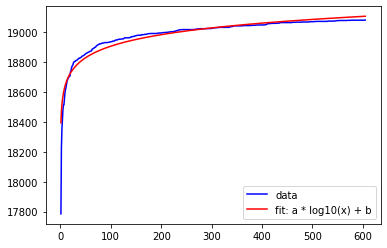

1185.5144059431561
[  256.66053474 18394.49706933]
fitted function: y = 256.6605347431396 * log10(x) + 18394.497069333112


In [14]:
# fit log10(x) line
def func(x, a, b):
    return a * np.log10(x) + b

x = np.array(range(1, len(vocab_sizes)+1))
y = np.array(vocab_sizes)

popt, pcov = curve_fit(func, x, y)

plt.plot(x, y, 'b-', label='data')
plt.plot(x, func(x, *popt), 'r-', label='fit: a * log10(x) + b')
plt.legend()

plt.show()

# calculate error of fit
print(mean_squared_error(y, func(x, *popt)))

# print popt
print(popt)

# print fitted function
print("fitted function: y = {} * log10(x) + {}".format(popt[0], popt[1]))

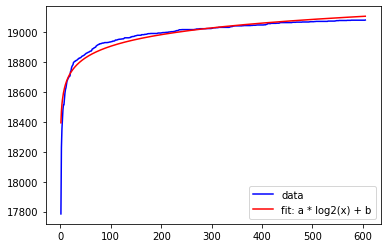

1185.5144059431582
[   77.26251861 18394.49707756]
fitted function: y = 77.26251860743167 * log2(x) + 18394.497077558066


In [15]:
# fit log2(x) line
def func(x, a, b):
    return a * np.log2(x) + b

x = np.array(range(1, len(vocab_sizes)+1))
y = np.array(vocab_sizes)

popt, pcov = curve_fit(func, x, y)

plt.plot(x, y, 'b-', label='data')
plt.plot(x, func(x, *popt), 'r-', label='fit: a * log2(x) + b')
plt.legend()

plt.show()

# calculate error of fit
print(mean_squared_error(y, func(x, *popt)))

# print popt
print(popt)

# print fitted function
print("fitted function: y = {} * log2(x) + {}".format(popt[0], popt[1]))

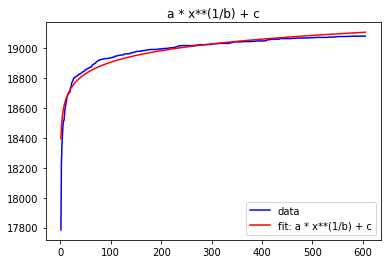

1185.578830354924
[ 9935933.4435045     89144.44341496 -9917538.9240622 ]
fitted function: y = 9935933.4435045 * x**(1/89144.44341495773) + -9917538.924062198


In [16]:
# fit sqrt(x) line
def func(x, a, b, c):
    return a * x**(1/b) + c

x = np.array(range(1, len(vocab_sizes)+1))
y = np.array(vocab_sizes)

popt, pcov = curve_fit(func, x, y)

plt.plot(x, y, 'b-', label='data')
plt.plot(x, func(x, *popt), 'r-', label='fit: a * x**(1/b) + c')
plt.legend()

plt.title("a * x**(1/b) + c")

plt.show()

# calculate error of fit
print(mean_squared_error(y, func(x, *popt)))

# print popt
print(popt)

# print fitted function
print("fitted function: y = {} * x**(1/{}) + {}".format(popt[0], popt[1], popt[2]))

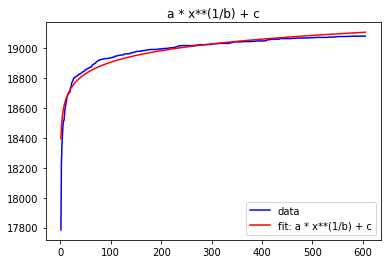

1185.578830354924
[ 9935933.4435045     89144.44341496 -9917538.9240622 ]
fitted function: y = 9935933.4435045 * x**(1/89144.44341495773) + -9917538.924062198


In [17]:
# fit sqrt(x) line
def func(x, a, b, c):
    return a * x**(1/b) + c

x = np.array(range(1, len(vocab_sizes)+1))
y = np.array(vocab_sizes)

popt, pcov = curve_fit(func, x, y)

plt.plot(x, y, 'b-', label='data')
plt.plot(x, func(x, *popt), 'r-', label='fit: a * x**(1/b) + c')
plt.legend()

plt.title("a * x**(1/b) + c")

plt.show()

# calculate error of fit
print(mean_squared_error(y, func(x, *popt)))

# print popt
print(popt)

# print fitted function
print("fitted function: y = {} * x**(1/{}) + {}".format(popt[0], popt[1], popt[2]))

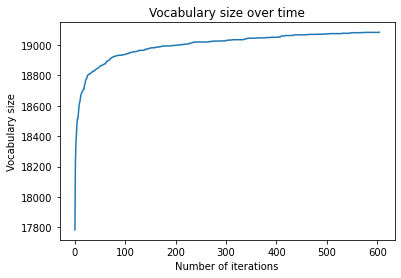

In [18]:
# plot vocab sizes
import matplotlib.pyplot as plt
plt.plot(vocab_sizes)
# ad x and y labels
plt.xlabel("Number of iterations")
plt.ylabel("Vocabulary size")

# add plot title
plt.title("Vocabulary size over time")

plt.show()

In [19]:
# calculate the jaccard overlap between vocabularies
def jaccard_overlap(model1, model2):
    vocab1 = set(model1.wv.vocab.keys())
    vocab2 = set(model2.wv.vocab.keys())
    return len(vocab1.intersection(vocab2))/len(vocab1.union(vocab2))

In [20]:
# calculate the jaccard overlap for each model and the previous one
jaccard_overlaps = [jaccard_overlap(load_model(files[i]), load_model(files[i-1])) for i in tqdm(range(1, len(files)))]

# plot jaccard overlaps
plt.plot(jaccard_overlaps)
# ad x and y labels
plt.xlabel("Number of iterations")
plt.ylabel("Jaccard overlap")

# add plot title
plt.title("Jaccard overlap between vocabularies of successive models") 

plt.show()

  0%|          | 0/604 [00:00<?, ?it/s]

KeyboardInterrupt: 

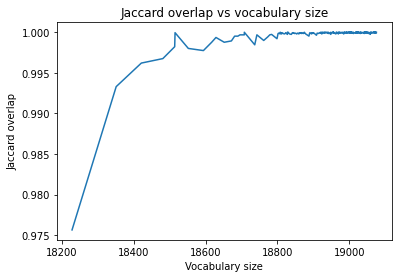

In [ ]:
# plot jaccard overlaps vs vocab size
plt.plot(vocab_sizes[1:], jaccard_overlaps)
# ad x and y labels
plt.xlabel("Vocabulary size")
plt.ylabel("Jaccard overlap")

# add plot title
plt.title("Jaccard overlap vs vocabulary size")

plt.show()

In [ ]:
# calculate the difference between two words in a model
def word_difference(model, word1, word2):
    return 1 - model.wv.similarity(word1, word2)



In [ ]:
# get the difference between king and queen for each model
word_differences = [word_difference(load_model(file), "king", "queen") for file in tqdm(files)]


  0%|          | 0/537 [00:00<?, ?it/s]

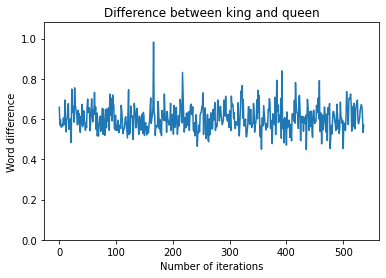

In [ ]:
# plot word differences
plt.plot(word_differences)

# ylimit between 0 and the max value plus ten percent
plt.ylim(0, max(word_differences)*1.1)

# ad x and y labels
plt.xlabel("Number of iterations")
plt.ylabel("Word difference")

# add plot title
plt.title("Difference between king and queen")

plt.show()

In [ ]:
# get the difference between boy and horse for each model
word_differences = [word_difference(load_model(file), "boy", "horse") for file in tqdm(files)]


  0%|          | 0/537 [00:00<?, ?it/s]

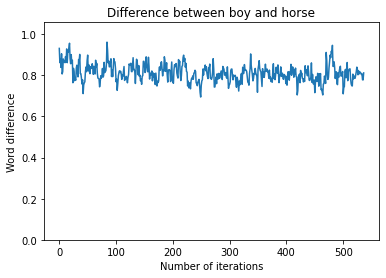

In [ ]:
# plot word differences
plt.plot(word_differences)

# ylimit between 0 and the max value plus ten percent
plt.ylim(0, max(word_differences)*1.1)

# ad x and y labels
plt.xlabel("Number of iterations")
plt.ylabel("Word difference")

# add plot title
plt.title("Difference between boy and horse")

plt.show()

In [ ]:
# function to load the vocabulary of a model
def load_vocab(model):
    return set(model.wv.vocab.keys())



In [ ]:
# function to randomly sample n pairs of words from a vocabulary
def sample_pairs(vocab, n):
    pairs = []
    for i in range(n):
        pair = np.random.choice(list(vocab), 2, replace=False)
        pairs.append(pair)
    return pairs


In [ ]:
# sample 1000 pairs of words
pairs = sample_pairs(load_vocab(load_model(files[0])), 10)

print(pairs[:10])

[array(['kg', '##zad'], dtype='<U18'), array(['פ', '##nse'], dtype='<U18'), array(['##nath', '##etal'], dtype='<U18'), array(['razor', 'namesake'], dtype='<U18'), array(['earlier', 'undertaken'], dtype='<U18'), array(['interchange', '##rag'], dtype='<U18'), array(['##roup', 'trait'], dtype='<U18'), array(['##itate', 'admire'], dtype='<U18'), array(['##iber', 'tragic'], dtype='<U18'), array(['##ppy', 'cavity'], dtype='<U18')]


In [ ]:
# calculate the word difference between each pair of words for each model
word_differences = [[word_difference(load_model(file), pair[0], pair[1]) for pair in pairs] for file in tqdm(files, desc="iterate over files")]

iterate over files:   0%|          | 0/537 [00:00<?, ?it/s]

In [ ]:
# calculate the change in word difference between each pair of words for each model
word_difference_changes = [[word_differences[i][j] - word_differences[i-1][j] for j in range(len(word_differences[i]))] for i in range(1, len(word_differences))]

In [ ]:
# calculate the average change in word difference between each pair of words for each model
average_word_difference_changes = [np.mean(word_difference_changes[i]) for i in range(len(word_difference_changes))]

print(average_word_difference_changes)

[0.09874475579708815, -0.023549124225974084, 0.00014677587896585464, 0.029121063835918903, -0.007780968397855759, 0.00048515647649765014, 0.006105193682014942, 0.0034965494647622108, 0.0013993550557643176, 0.006251689186319709, 0.00954031702131033, -0.016831928677856923, -0.005872037634253502, 0.002526732347905636, 0.0023773903027176856, -0.0001150079071521759, -0.0033498786389827727, 0.0069132279604673386, -0.0013846529182046652, 0.0007685539778321982, -0.009467324241995811, 0.009050367400050163, 0.007275765668600798, -0.003922419250011444, 0.0062798176775686445, -0.004772360611241311, 0.002959766611456871, 0.0015425525605678558, -1.1011306196451186e-05, 0.0036594084464013576, 0.003380007855594158, -0.0034297969192266463, 0.0038308310322463512, 0.0038196523673832417, -0.00460295844823122, 0.0020428464747965338, -0.0015777824446558952, 0.01542124366387725, -0.0021868374198675154, -0.0033170898910611867, -0.00045037964591756465, 0.005432187498081475, -0.009223337075673044, 0.00451463002

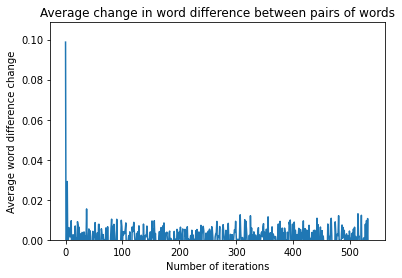

In [ ]:
# plot average word difference changes
plt.plot(average_word_difference_changes)

# ylimit between 0 and the max value plus ten percent
plt.ylim(0, max(average_word_difference_changes)*1.1)

# ad x and y labels
plt.xlabel("Number of iterations")
plt.ylabel("Average word difference change")

# add plot title
plt.title("Average change in word difference between pairs of words")

plt.show()

